# Data Distribution

In this notebook, we visualize the data to get more insight into what preprocessing and feature engineering techniques are required to be applied to the data frame before feeding it to the models. We download the data using the `data_downloader.py` file. In the `data/raw/` folder, the data that is going to be used for the models is `train-balanced-sarcasm.csv`.


In [19]:
from pathlib import Path
import pandas as pd


root = Path().resolve()

train_data_path = root / 'data' / 'raw' / 'train-balanced-sarcasm.csv'

train_df = pd.read_csv(train_data_path)

print(train_df.info())
print(train_df.describe())
print(train_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010826 entries, 0 to 1010825
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   label           1010826 non-null  int64 
 1   comment         1010771 non-null  object
 2   author          1010826 non-null  object
 3   subreddit       1010826 non-null  object
 4   score           1010826 non-null  int64 
 5   ups             1010826 non-null  int64 
 6   downs           1010826 non-null  int64 
 7   date            1010826 non-null  object
 8   created_utc     1010826 non-null  object
 9   parent_comment  1010826 non-null  object
dtypes: int64(4), object(6)
memory usage: 77.1+ MB
None
           label         score           ups         downs
count  1010826.0  1.010826e+06  1.010826e+06  1.010826e+06
mean         0.5  6.885676e+00  5.498885e+00 -1.458629e-01
std          0.5  4.834288e+01  4.127297e+01  3.529689e-01
min          0.0 -5.070000e+02 -5.070000e+0

In [20]:
print(train_df.head())

   label                                            comment     author  \
0      0                                         NC and NH.  Trumpbart   
1      0  You do know west teams play against west teams...  Shbshb906   
2      0  They were underdogs earlier today, but since G...   Creepeth   
3      0  This meme isn't funny none of the "new york ni...  icebrotha   
4      0                    I could use one of those tools.  cush2push   

            subreddit  score  ups  downs     date          created_utc  \
0            politics      2   -1     -1  2016-10  2016-10-16 23:55:23   
1                 nba     -4   -1     -1  2016-11  2016-11-01 00:24:10   
2                 nfl      3    3      0  2016-09  2016-09-22 21:45:37   
3  BlackPeopleTwitter     -8   -1     -1  2016-10  2016-10-18 21:03:47   
4  MaddenUltimateTeam      6   -1     -1  2016-12  2016-12-30 17:00:13   

                                      parent_comment  
0  Yeah, I get that argument. At this point, I'd ...  


The following code shows the most frequent subreddits (top 10) in the Reddit data frame.

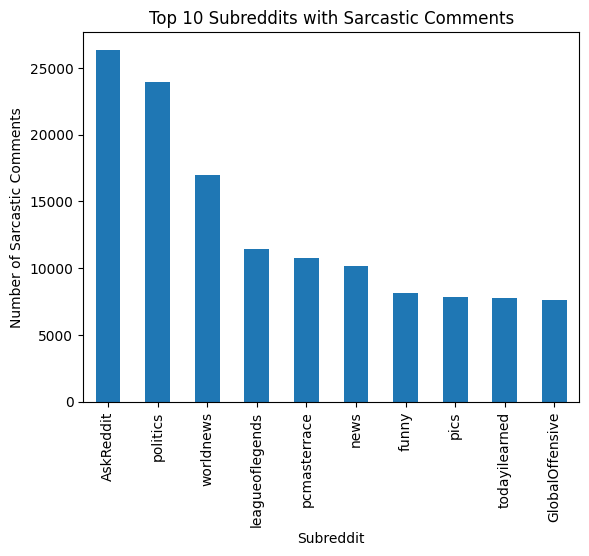

In [21]:
import matplotlib.pyplot as plt

sarcastic_subreddits = train_df[train_df['label'] == 1]['subreddit'].value_counts().head(10)
sarcastic_subreddits.plot(kind='bar')
plt.title('Top 10 Subreddits with Sarcastic Comments')
plt.xlabel('Subreddit')
plt.ylabel('Number of Sarcastic Comments')
plt.show()


The `label` feature gives either the values of 1 or 0 for sarcastic or non-sarcastic comments. The following code generates the time-series plot based on the date of the published comments alongside their label.

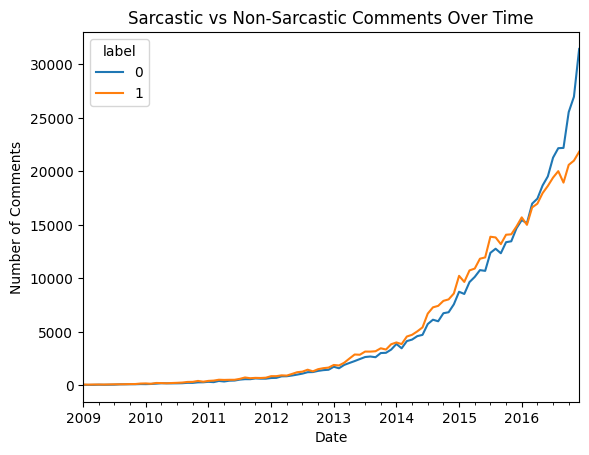

In [22]:
train_df['date'] = pd.to_datetime(train_df['date'], format='%Y-%m')
sarcasm_over_time = train_df.groupby(['date', 'label']).size().unstack()
sarcasm_over_time.plot()
plt.title('Sarcastic vs Non-Sarcastic Comments Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Comments')
plt.show()


With the following code, users can check on the frequency of one word across the entire data frame.

In [23]:
word = 'trump'

train_df['comment'] = train_df['comment'].str.lower()
word_count = train_df['comment'].str.count(r'\b{}\b'.format(word)).sum()

print(f"The word '{word}' appeared {word_count} times in the dataset.")

The word 'trump' appeared 6058.0 times in the dataset.


The following two codes show the most frequent words (top 15) in the data frame, and respectively the it generates the graph for better visualization.

In [24]:
from collections import Counter

train_df['comment'] = train_df['comment'].fillna('')

all_words = ' '.join(train_df['comment']).split()

word_frequency = Counter(all_words)

common_words = word_frequency.most_common(15)

for rank, (word, count) in enumerate(common_words, start=1):
    print(f"Rank {rank}: '{word}' appeared {count} times")

Rank 1: 'the' appeared 394112 times
Rank 2: 'a' appeared 243549 times
Rank 3: 'to' appeared 237354 times
Rank 4: 'i' appeared 181201 times
Rank 5: 'and' appeared 171894 times
Rank 6: 'you' appeared 161008 times
Rank 7: 'is' appeared 150268 times
Rank 8: 'of' appeared 148847 times
Rank 9: 'that' appeared 131029 times
Rank 10: 'in' appeared 113922 times
Rank 11: 'it' appeared 107243 times
Rank 12: 'for' appeared 94986 times
Rank 13: 'but' appeared 74404 times
Rank 14: 'be' appeared 71543 times
Rank 15: 'this' appeared 69497 times


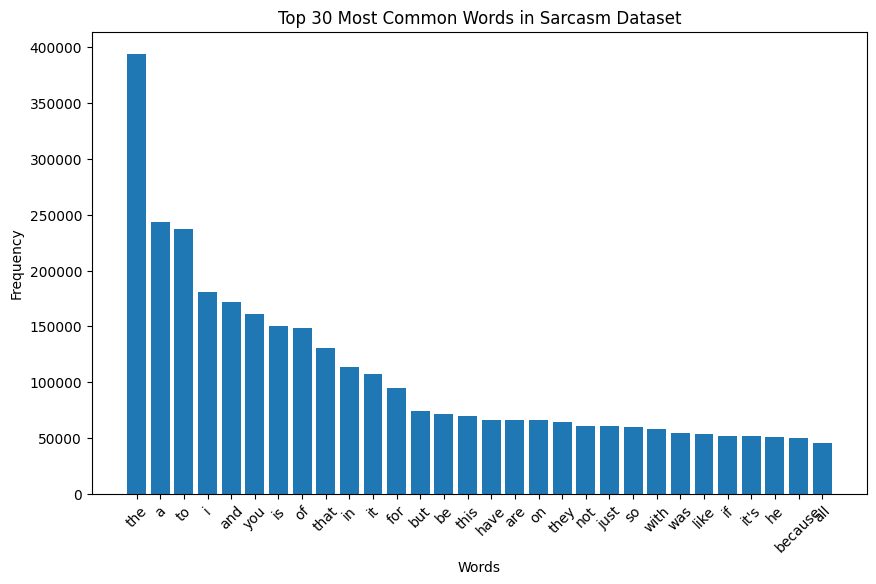

In [42]:
words, counts = zip(*common_words)

plt.figure(figsize=(10, 6))
plt.bar(range(1, len(words) + 1), counts, tick_label=words)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 30 Most Common Words in Sarcasm Dataset')
plt.xticks(rotation=45)
plt.show()

# Processed Data Analysis


As it can be observed below, the `processed` data has no longer missing values after preprocessing.

In [5]:
import pandas as pd
from pathlib import Path

root = Path().resolve()

path = root / 'data' / 'processed' / 'processed_sarcasm.csv'

processed = pd.read_csv(path, sep=',')

print(processed.info())
print(processed.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007630 entries, 0 to 1007629
Data columns (total 12 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   label              1007630 non-null  int64 
 1   comment            1007630 non-null  object
 2   author             1007630 non-null  object
 3   subreddit          1007630 non-null  object
 4   score              1007630 non-null  int64 
 5   ups                1007630 non-null  int64 
 6   downs              1007630 non-null  int64 
 7   date               1007630 non-null  object
 8   created_utc        1007630 non-null  object
 9   parent_comment     1007630 non-null  object
 10  comment_tokenized  1007630 non-null  object
 11  parent_tokenized   1007630 non-null  object
dtypes: int64(4), object(8)
memory usage: 92.3+ MB
None
label                0
comment              0
author               0
subreddit            0
score                0
ups                  0
downs  

The following code creates the heatmap to observe what features to use in our model training.

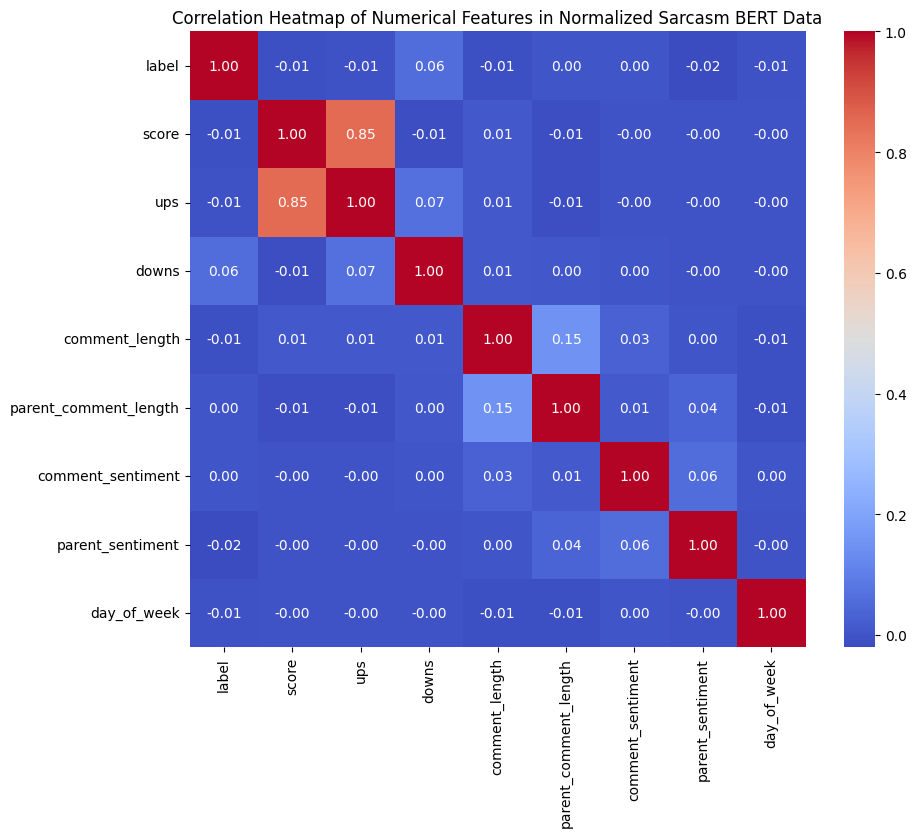

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

root = Path().resolve()
data = pd.read_csv(root / 'data' / 'processed' / 'normalized_sarcasm_bert.csv')

numerical_data = data.select_dtypes(include='number')

correlation_matrix = numerical_data.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True, square=True)
plt.title("Correlation Heatmap of Numerical Features in Normalized Sarcasm BERT Data")
plt.show()

In [6]:
import pandas as pd
from pathlib import Path

# Load the data
root = Path().resolve()
data = pd.read_csv(root / 'data' / 'splits' / 'train_data_distilbert.csv')

# Columns to drop based on correlation heatmap analysis
# Keep 'comment_sentiment' and 'parent_sentiment' since they might be valuable
columns_to_drop = ['score', 'ups', 'downs', 'day_of_week', 'comment_length', 'parent_comment_length']

# Drop the specified columns
data_cleaned = data.drop(columns=columns_to_drop)

new_dir = root / 'data' / 'new'
new_dir.mkdir(parents=True, exist_ok=True)

# Save the cleaned dataset (optional)
data_cleaned.to_csv(new_dir / 'train_data_distilbert.csv', index=False)

print("Columns dropped and dataset saved successfully.")

Columns dropped and dataset saved successfully.
